# Proyecto: Predicción de edad de abulones (Abalone dataset)
**Objetivo:** Realizar un EDA completo (11 pasos) y construir un modelo predictivo para la edad (`Age = Rings + 1.5`) usando el Abalone Dataset.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

## Paso 2 — Importar datos
Cargamos el dataset directamente desde la URL: https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data  
Asignamos nombres de columnas y creamos una copia de trabajo (para preservar el dataset original).  
Además crearemos la variable `Age = Rings + 1.5`.


In [9]:
# Cargar el dataset (ajustar la URL según su grupo)

nombres_columnas = ['Sex', 'longitud', 'Diametro', 'altura', 'peso_total', 'peso_cuerpo', 'peso_viseras', 'peso_concha', 'anillos']
datos = pd.read_csv(' https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data ',
                    names= nombres_columnas,
                    header=None)
# Crear una copia de trabajo

datos_trabajo = datos.copy()
# Visualizar las primeras filas
print(datos_trabajo.head())
print(f"\nDimensiones del dataset: {datos_trabajo.shape}")

  Sex  longitud  Diametro  altura  peso_total  peso_cuerpo  peso_viseras  \
0   M     0.455     0.365   0.095      0.5140       0.2245        0.1010   
1   M     0.350     0.265   0.090      0.2255       0.0995        0.0485   
2   F     0.530     0.420   0.135      0.6770       0.2565        0.1415   
3   M     0.440     0.365   0.125      0.5160       0.2155        0.1140   
4   I     0.330     0.255   0.080      0.2050       0.0895        0.0395   

   peso_concha  anillos  
0        0.150       15  
1        0.070        7  
2        0.210        9  
3        0.155       10  
4        0.055        7  

Dimensiones del dataset: (4177, 9)


In [10]:
import os

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
col_names = ['Sex', 'longitud', 'Diametro', 'altura', 'peso_total', 'peso_cuerpo', 'peso_viseras', 'peso_concha', 'anillos']

df = pd.read_csv(url, header=None, names=col_names)
df_original = df.copy()  # preservamos original

# Crear variable Age = Rings + 1.5 (justificación: edad aproximada en años; Rings ~ número de anillos, +1.5 para ajustar estimación media)
df['Age'] = df['anillos'] + 1.5

print("Datos cargados \u2014 shape:", df.shape)
df.head(10)

Datos cargados — shape: (4177, 10)


,Sex,longitud,Diametro,altura,peso_total,peso_cuerpo,peso_viseras,peso_concha,anillos,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,21.5
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,17.5
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,10.5
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,20.5


## Paso 3 — Revisar datos NAN
Verificaremos tipos, estadísticos, valores faltantes y construiremos un pequeño reporte con columnas, tipos, n_missing, n_unique y %missing.


=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           4177 non-null   object 
 1   longitud      4177 non-null   float64
 2   Diametro      4177 non-null   float64
 3   altura        4177 non-null   float64
 4   peso_total    4177 non-null   float64
 5   peso_cuerpo   4177 non-null   float64
 6   peso_viseras  4177 non-null   float64
 7   peso_concha   4177 non-null   float64
 8   anillos       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB

=== ESTADÍSTICOS DESCRIPTIVOS ===
          longitud     Diametro       altura   peso_total  peso_cuerpo  \
count  4177.000000  4177.000000  4177.000000  4177.000000  4177.000000   
mean      0.523992     0.407881     0.139516     0.828742     0.359367   
std       0.120093     0.099240     0.041827     0.490389     0.2219

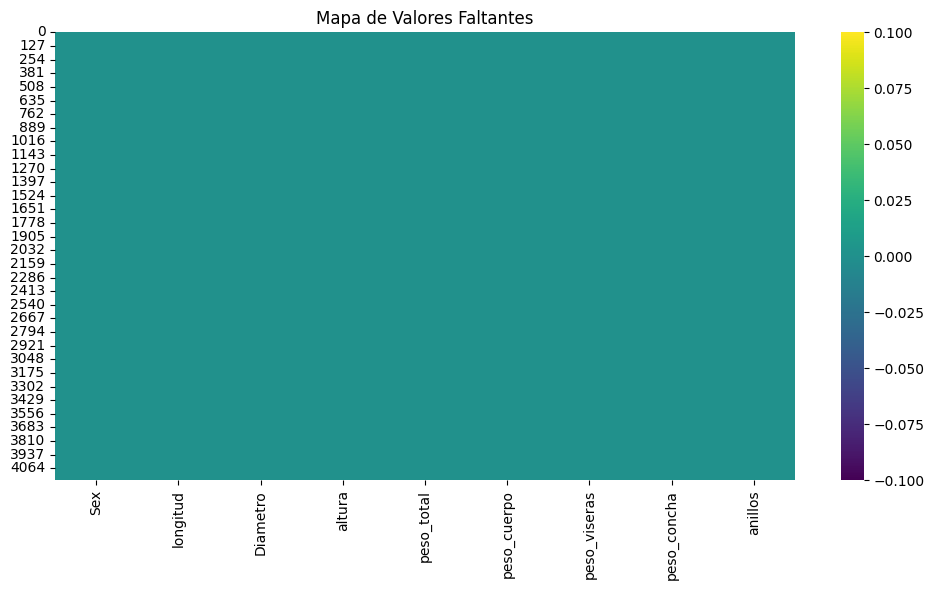

In [11]:
# Información general del dataset
print("=== INFORMACIÓN DEL DATASET ===")
datos_trabajo.info()
# Estadísticos descriptivos
print("\n=== ESTADÍSTICOS DESCRIPTIVOS ===")
print(datos_trabajo.describe())
# Conteo de valores faltantes
print("\n=== VALORES FALTANTES ===")
print(datos_trabajo.isna().sum())
# Visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(datos_trabajo.isna(), cbar=True, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.tight_layout()
plt.show()

## Paso 4 — Limpiar datos
Tareas:
- Normalizar `Sex` (strip, upper)
- Detectar y eliminar duplicados
- Tratar valores faltantes (si existen)
- Detectar outliers mediante IQR y mostrar ejemplos
- Aplicar transformaciones justificadas (p.ej. log en pesos si hay asimetría)


In [12]:
df['Sex'] = df['Sex'].astype(str).str.strip().str.upper()
print("Valores únicos en Sex:", df['Sex'].unique())

# Duplicados
n_dup = df.duplicated().sum()
print(f"Duplicados encontrados: {n_dup}")
if n_dup > 0:
    df = df.drop_duplicates()
    print("Duplicados eliminados. Nuevo shape:", df.shape)

# No vemos valores NaN (revisar)
print("Missing tras limpieza:", df.isna().sum().sum())

# Detectar outliers por IQR para variables numéricas
# Excluir 'Sex' de num_cols porque es categórica
num_cols = ['longitud', 'Diametro', 'altura', 'peso_total', 'peso_cuerpo', 'peso_viseras', 'peso_concha']
outlier_summary = []
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers = df[(df[col] < low) | (df[col] > high)]
    outlier_summary.append((col, len(outliers), low, high))
    print(f"{col}: outliers={len(outliers)} (limits: {low:.4f}, {high:.4f})")
    if len(outliers)>0:
        display(outliers.sample(min(3, len(outliers))))

# Aplicar transformación log1p a pesos si la distribución está muy sesgada
for col in ["peso_total","peso_cuerpo","peso_viseras","peso_concha"]:
    print(f"{col} skew before: {df[col].skew():.3f}")
    df[f'{col}_log1p'] = np.log1p(df[col])
    print(f"{col} skew after (log1p): {df[f'{col}_log1p'].skew():.3f}")

Valores únicos en Sex: ['M' 'F' 'I']
Duplicados encontrados: 0
Missing tras limpieza: 0
longitud: outliers=49 (limits: 0.2025, 0.8625)


,Sex,longitud,Diametro,altura,peso_total,peso_cuerpo,peso_viseras,peso_concha,anillos,Age
239,I,0.160,0.12,0.035,0.0210,0.0075,0.0045,0.0050,5,6.5
148,I,0.175,0.13,0.055,0.0315,0.0105,0.0065,0.0125,5,6.5
1053,I,0.185,0.13,0.045,0.0290,0.0120,0.0075,0.0095,4,5.5


Diametro: outliers=59 (limits: 0.1550, 0.6750)


,Sex,longitud,Diametro,altura,peso_total,peso_cuerpo,peso_viseras,peso_concha,anillos,Age
2545,I,0.205,0.150,0.065,0.0400,0.0200,0.0110,0.013,4,5.5
2115,I,0.180,0.130,0.045,0.0275,0.0125,0.0100,0.009,3,4.5
2343,I,0.170,0.125,0.055,0.0235,0.0090,0.0055,0.008,6,7.5


altura: outliers=29 (limits: 0.0400, 0.2400)


,Sex,longitud,Diametro,altura,peso_total,peso_cuerpo,peso_viseras,peso_concha,anillos,Age
3996,I,0.315,0.23,0.00,0.1340,0.0575,0.0285,0.3505,6,7.5
2171,I,0.190,0.13,0.03,0.0295,0.0155,0.0150,0.0100,6,7.5
694,I,0.165,0.11,0.02,0.0190,0.0065,0.0025,0.0050,4,5.5


peso_total: outliers=30 (limits: -0.6258, 2.2203)


,Sex,longitud,Diametro,altura,peso_total,peso_cuerpo,peso_viseras,peso_concha,anillos,Age
1762,M,0.770,0.620,0.195,2.5155,1.1155,0.6415,0.6420,12,13.5
1761,M,0.750,0.595,0.205,2.2205,1.0830,0.4210,0.6300,12,13.5
2624,M,0.765,0.585,0.180,2.3980,1.1280,0.5120,0.5335,12,13.5


peso_cuerpo: outliers=48 (limits: -0.2880, 0.9760)


,Sex,longitud,Diametro,altura,peso_total,peso_cuerpo,peso_viseras,peso_concha,anillos,Age
1427,F,0.75,0.610,0.235,2.5085,1.2320,0.519,0.612,14,15.5
3993,M,0.72,0.600,0.235,2.2385,0.9840,0.411,0.621,12,13.5
3007,M,0.73,0.585,0.225,2.2305,1.2395,0.422,0.563,14,15.5


peso_viseras: outliers=26 (limits: -0.1458, 0.4923)


,Sex,longitud,Diametro,altura,peso_total,peso_cuerpo,peso_viseras,peso_concha,anillos,Age
1762,M,0.770,0.620,0.195,2.5155,1.1155,0.6415,0.6420,12,13.5
2863,M,0.740,0.595,0.190,2.3235,1.1495,0.5115,0.5050,11,12.5
1052,M,0.765,0.600,0.220,2.3020,1.0070,0.5090,0.6205,12,13.5


peso_concha: outliers=35 (limits: -0.1685, 0.6275)


,Sex,longitud,Diametro,altura,peso_total,peso_cuerpo,peso_viseras,peso_concha,anillos,Age
164,F,0.650,0.545,0.23,1.7520,0.5605,0.2895,0.815,16,17.5
4145,M,0.670,0.525,0.20,1.7405,0.6205,0.2970,0.657,11,12.5
168,M,0.705,0.560,0.22,1.9810,0.8175,0.3085,0.760,14,15.5


peso_total skew before: 0.531
peso_total skew after (log1p): -0.038
peso_cuerpo skew before: 0.719
peso_cuerpo skew after (log1p): 0.306
peso_viseras skew before: 0.592
peso_viseras skew after (log1p): 0.376
peso_concha skew before: 0.621
peso_concha skew after (log1p): 0.315


## Paso 5 — Visualizaciones
Generaremos las visualizaciones solicitadas para cada variable: countplot para Sex, hist + kde, boxplots, scatter plots relevantes y relaciones target vs features. Después de cada figura, se debe añadir una breve interpretación.


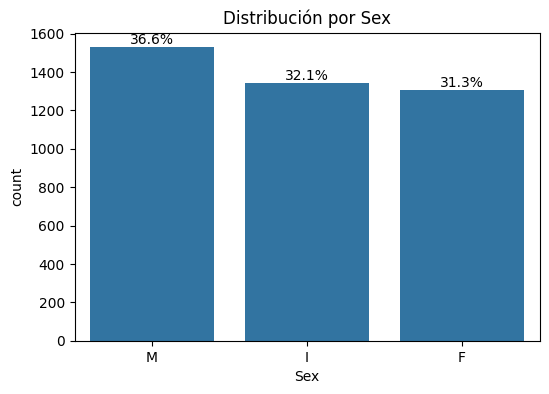

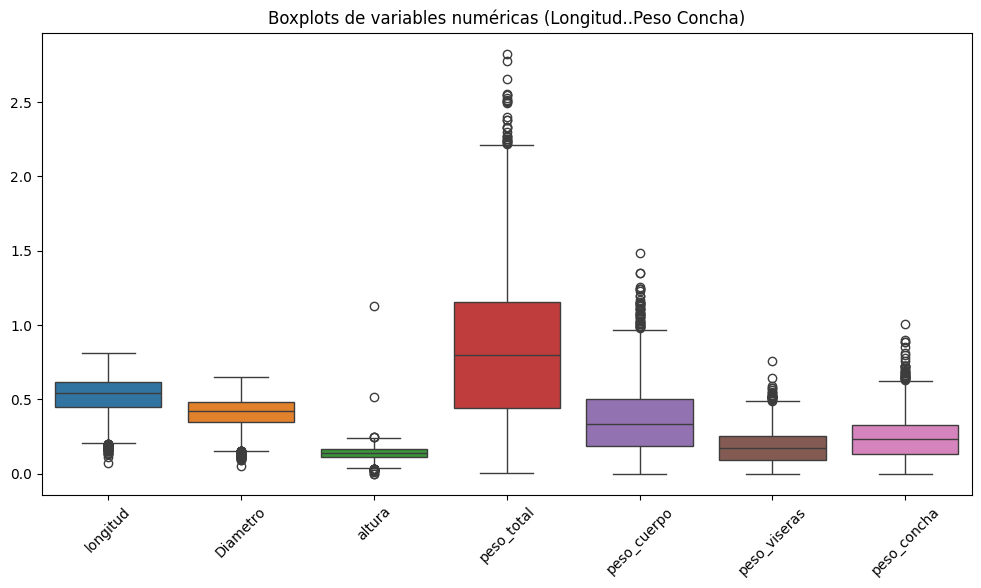

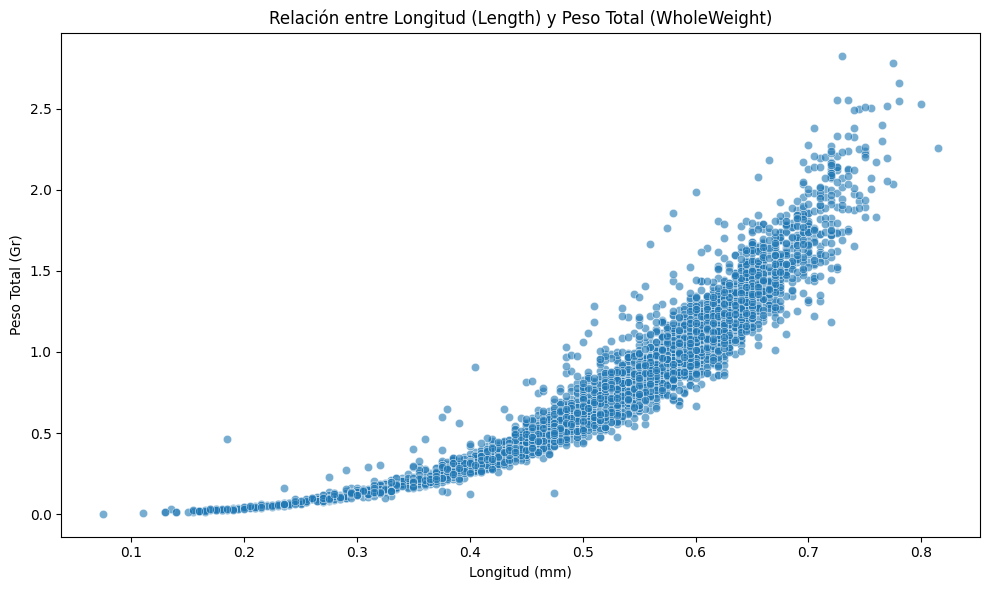

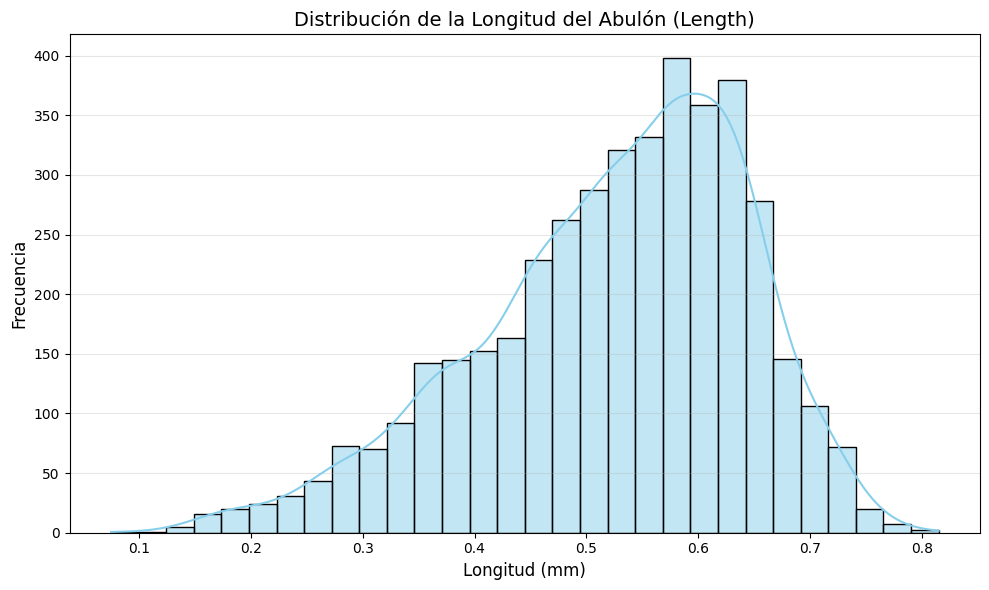

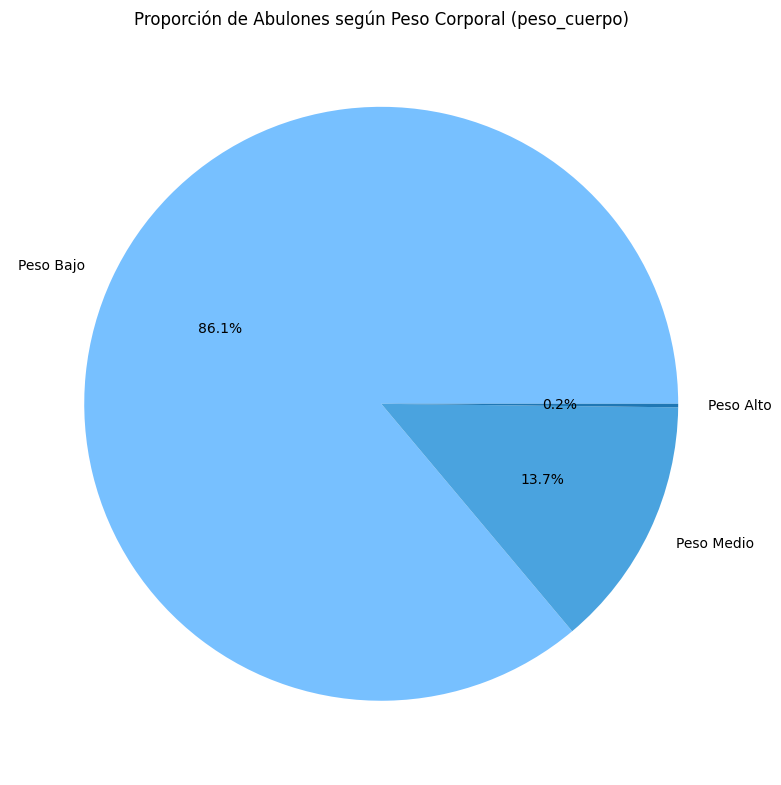

In [14]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Sex', order=df['Sex'].value_counts().index)
total = len(df)
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha='center', va='bottom')
plt.title('Distribución por Sex')
plt.show()


# Boxplots para detectar outliers
# num_cols ya está definido con nombres en español en la celda anterior
num_cols = ['longitud', 'Diametro', 'altura', 'peso_total', 'peso_cuerpo', 'peso_viseras', 'peso_concha']
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title('Boxplots de variables numéricas (Longitud..Peso Concha)')
plt.xticks(rotation=45)
plt.show()

# Gráfica 4: Relación entre Longitud y Peso Total
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitud', y='peso_total', alpha=0.6)
plt.title('Relación entre Longitud (Length) y Peso Total (WholeWeight)')
plt.xlabel('Longitud (mm)')
plt.ylabel('Peso Total (Gr)')
plt.tight_layout()
plt.show()


# Gráfica: Distribución de la Longitud (Length)

plt.figure(figsize=(10, 6))
sns.histplot(df['longitud'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de la Longitud del Abulón (Length)', fontsize=14)
plt.xlabel('Longitud (mm)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Definir los rangos según la distribución del dataset
bins = [0, 0.6, 1.2, df['peso_cuerpo'].max()]
labels = ['Peso Bajo', 'Peso Medio', 'Peso Alto']

# Asegurarse de que 'Rango_Peso' se cree correctamente con 'peso_cuerpo'
df['Rango_Peso'] = pd.cut(df['peso_cuerpo'], bins=bins, labels=labels, include_lowest=True)

# Gráfico de pastel
plt.figure(figsize=(8, 8))
df['Rango_Peso'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#77c0ff', '#4aa3df', '#1f77b4'])
plt.title('Proporción de Abulones según Peso Corporal (peso_cuerpo)')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Interpretaciones rápidas (ejemplo)**  
- `Sex`: distribución por M, F, I; indicar si hay balance o no.  
- `Length` y `WholeWeight`: parece existir correlación positiva.  
- `Rings`/`Age`: revisar sesgo; si es muy sesgada, considerar transformaciones o robustez en métricas.  
(Escribir tu análisis después de observar las gráficas en el notebook.)


## Paso 6 — Conversión de variables a número
Se codificará `Sex` usando OneHotEncoder (prefiero One-Hot para que no haya orden implícito).
Todas las transformaciones se incluirán en un `ColumnTransformer` para garantizar reproducibilidad.


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
categorical_features = ['Sex']
numeric_features = ["longitud","Diametro","altura","peso_total","peso_cuerpo","peso_viseras","peso_concha"]
# We also created log versions for weights; decide si usarlas (toggle)
numeric_with_logs = numeric_features + [f'{c}_log1p' for c in ["peso_total","peso_cuerpo","peso_viseras","peso_concha"]
                                        if f'{c}_log1p' in df.columns] # Ensure log columns exist

# Transformer ejemplo: OneHotEncoder para Sex, StandardScaler para num (puedes cambiar a MinMaxScaler)
onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler_std = StandardScaler()
column_transformer = ColumnTransformer([
    ('onehot', onehot, categorical_features),
    ('scaler', scaler_std, numeric_with_logs),
], remainder='drop', verbose_feature_names_out=False)

# Mostrar ejemplo de transformación (sin encajar completamente)
sample_X = df[categorical_features + numeric_with_logs].head()
display(sample_X)

## Paso 7 — Normalización
Compararemos `StandardScaler` vs `MinMaxScaler` y dejaremos la elección documentada. Importante: **no** escalamos la variable objetivo `Age`.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

RANDOM_STATE = 42 # Definir RANDOM_STATE para reproducibilidad
scalers = {'StandardScaler': StandardScaler(), 'MinMaxScaler': MinMaxScaler()}
col_to_check = ['peso_total']
df_sample = df[col_to_check].dropna().sample(200, random_state=RANDOM_STATE)
for name, s in scalers.items():
    transformed = s.fit_transform(df_sample)
    print(f"\n{name} — mean: {transformed.mean():.4f}, std: {transformed.std():.4f}, min: {transformed.min():.4f}, max: {transformed.max():.4f}")
    plt.figure(figsize=(6,3))
    sns.histplot(transformed.flatten(), kde=True)
    plt.title(f'{name} aplicado a {col_to_check[0]}')
    plt.show()

## Paso 8 — Correlación
Calcularemos matriz de correlación Pearson y Spearman y visualizaremos heatmaps. Identificaremos variables con mayor correlación con `Age`.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Asegurar consistencia de los datos ---
df['Sex'] = df['Sex'].astype(str).str.strip().str.upper()

# Crear un dataframe auxiliar con codificación one-hot (sin modificar el original)
df_corr = pd.get_dummies(df, columns=['Sex'], prefix='Sex', drop_first=False)

# Seleccionar solo columnas numéricas
num_df = df_corr.select_dtypes(include=[np.number])

# --- Calcular correlaciones ---
corr_pearson = num_df.corr(method='pearson')
corr_spearman = num_df.corr(method='spearman')

# --- Heatmap Pearson ---
plt.figure(figsize=(12,10))
sns.heatmap(corr_pearson, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlación (Pearson)', fontsize=14, pad=15)
plt.show()

# --- Heatmap Spearman ---
plt.figure(figsize=(12,10))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap='viridis', center=0)
plt.title('Matriz de Correlación (Spearman)', fontsize=14, pad=15)
plt.show()

# --- Correlación con Age ---
corr_with_age = corr_pearson['Age'].sort_values(ascending=False)
display(corr_with_age)

# --- Identificar correlaciones fuertes ---
threshold_pos = 0.5
threshold_neg = -0.3
strong_pos = corr_with_age[corr_with_age > threshold_pos]
strong_neg = corr_with_age[corr_with_age < threshold_neg]

print("\nVariables con correlación positiva fuerte (> 0.5):")
print(strong_pos)

print("\nVariables con correlación negativa fuerte (< -0.3):")
print(strong_neg)

# --- Interpretación automática ---
def interpretar_correlacion(corr_series):
    """Genera interpretación textual a partir de la correlación con Age."""
    top_vars = corr_series.head(3).index.tolist()
    msg = f"Las variables con mayor correlación positiva con la edad son {', '.join(top_vars[:3])}. "
    if len(strong_neg) > 0:
        neg_vars = ', '.join(strong_neg.index.tolist())
        msg += f"Se observaron correlaciones negativas destacadas con {neg_vars}, "
        msg += "lo que sugiere una relación inversa con la edad."
    else:
        msg += "No se observaron correlaciones negativas significativas."
    return msg

print("\nInterpretación automática:")
print(interpretar_correlacion(corr_with_age))

## Paso 9 — Test de Normalidad

Objetivo: evaluar si las variables numéricas clave (Length, Diameter, Height, pesos, Rings, Age) siguen una distribución normal.
Procedimiento:
- Aplicar Shapiro-Wilk (válido para n ≤ 5000). Si n > 5000, se usa KS o sólo chequeos visuales (QQ-plot + hist).
- Reportar p-values y conclusiones (ALPHA = 0.05).
- Mostrar Q-Q plots para las variables con mayor desviación.

In [ ]:
from scipy.stats import shapiro
import pandas as pd

# Función para test de normalidad Shapiro-Wilk
def test_normalidad(dataframe, alpha=0.05):
    print("=== TEST DE SHAPIRO-WILK PARA NORMALIDAD ===")
    print(f"Nivel de significancia (α): {alpha}\n")

    resultados = []

    for col in dataframe.columns:
        # Solo aplicar a variables numéricas
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            data = dataframe[col].dropna()

            # Shapiro requiere al menos 3 datos
            if len(data) >= 3:
                stat, p_value = shapiro(data)
                conclusion = "NORMAL" if p_value > alpha else "NO NORMAL"

                resultados.append([col, stat, p_value, conclusion])

    # Crear tabla bonita
    tabla_resultados = pd.DataFrame(resultados,
        columns=["Variable", "W (estadístico)", "p-valor", "Conclusión"])

    return tabla_resultados

# Ejecutar el test en el dataset de trabajo
tabla_normalidad = test_normalidad(df)   # Cambia df si tu dataset se llama diferente
tabla_normalidad

**Interpretación del test de normalidad (Shapiro-Wilk)**

El test de Shapiro-Wilk mostró p < 0.05 para las variables analizadas: **no siguen distribución normal**.
Esto es esperado en datos biológicos (los pesos y medidas suelen estar sesgados).

**Decisión y justificación:** Continuamos con el modelado porque los algoritmos usados (Ridge, RandomForest,
GradientBoosting, XGBoost) no requieren normalidad de las variables. Además:
- Aplicamos `log1p` a variables de peso cuando fue apropiado.
- Estandarizamos características dentro de `ColumnTransformer`.
Por tanto, la no-normalidad queda documentada y mitigada para fines predictivos.


## Paso 10 — Pregunta de investigación
Propuestas:
1. ¿Qué tan bien se puede predecir la edad (`Age`) de un abulón a partir de sus medidas físicas y sexo? (Pregunta principal)



## Paso 11 — Prediccion


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ================================
# 1. Definir variable objetivo
# ================================
# Corregir data leakage: Eliminar 'anillos' de las características, ya que 'Age' se deriva directamente de ella.
X = df.drop(['Age', 'anillos'], axis=1)
y = df['Age']

# ================================
# 2. Separar datos en train/test
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================================
# 3. Procesamiento:
#    - OneHot para 'Sex'
#    - StandardScaler para numéricas
# ================================
columnas_categoricas = ['Sex']
# Construir columnas_numericas excluyendo las categóricas
columnas_numericas = [col for col in X_train.columns if col not in columnas_categoricas]

preprocesamiento = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), columnas_categoricas),
    ('scaler', StandardScaler(), columnas_numericas)
])

# ================================
# 4. Crear Pipeline + Entrenar
# ================================
modelo_lineal = Pipeline(steps=[
    ('preprocesamiento', preprocesamiento),
    ('modelo', LinearRegression())
])

modelo_lineal.fit(X_train, y_train)

# ================================
# 5. Realizar predicciones
# ================================
y_pred = modelo_lineal.predict(X_test)

# ================================
# 6. Evaluación del modelo
# ================================
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== EVALUACIÓN DEL MODELO ===")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del MSE): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")
print(f"\nInterpretación: El modelo explica aproximadamente el {r2*100:.2f}% "
      f"de la variabilidad en la edad (Age).")

# ================================
# 7. Importancia de Variables
# ================================
# Obtener nombres de todas las features transformadas
nombres_ohe = modelo_lineal.named_steps['preprocesamiento']\
    .named_transformers_['onehot']\
    .get_feature_names_out(columnas_categoricas)

nombres_finales = list(nombres_ohe) + columnas_numericas

coeficientes = pd.DataFrame({
    'Variable': nombres_finales,
    'Coeficiente': modelo_lineal.named_steps['modelo'].coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print("\n=== IMPORTANCIA DE VARIABLES (Regresión Lineal) ===")
display(coeficientes) # Usar display para DataFrames

# ================================
# 8. Gráfico: Reales vs Predichos
# ================================
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Predicción Perfecta')

plt.xlabel('Edad Real (Age)')
plt.ylabel('Edad Predicha')
plt.title('Desempeño del Modelo de Regresión Lineal')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()